# 🎓 Student Performance Predictor

This notebook predicts student outcomes (pass/fail) based on features like attendance, study hours, and participation. The project uses simulated data and trains classification models to assess performance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 📥 Load Dataset

In [7]:
df = pd.read_csv('../data/simulated_student_data.csv')
df.head()

,attendance,study_hours,participation,pass_fail
0,88,4.67,5,1
1,78,0.04,5,0
2,64,1.13,4,0
3,92,1.83,3,0
4,57,2.44,9,0


## 📊 Exploratory Data Analysis

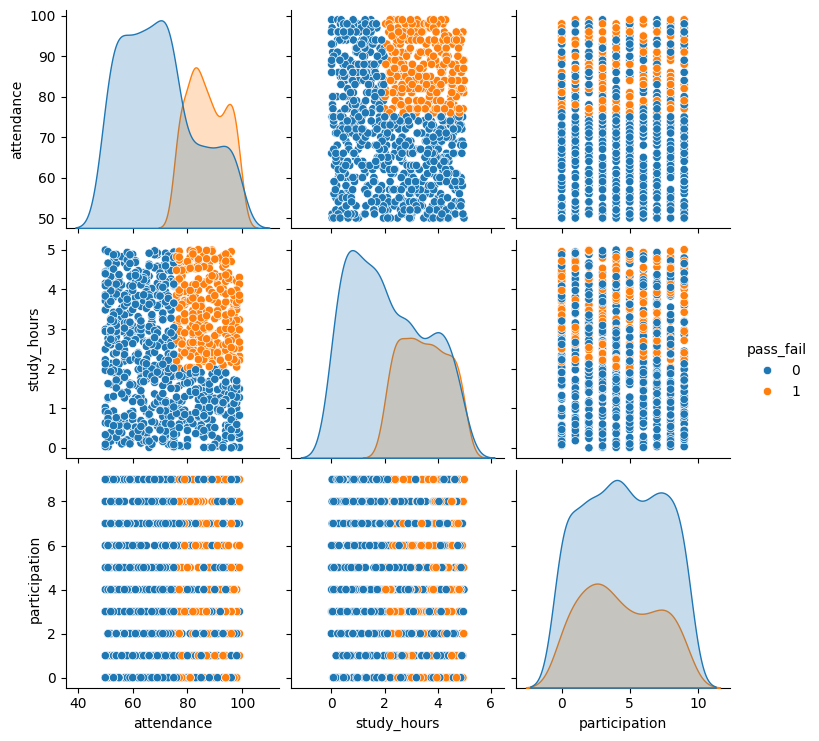

In [8]:
sns.pairplot(df, hue='pass_fail')
plt.show()

## 🧹 Data Preprocessing

In [9]:
# Convert target to binary
X = df.drop('pass_fail', axis=1)
y = df['pass_fail']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Model 1: Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       140
           1       0.83      0.83      0.83        60

    accuracy                           0.90       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.90      0.90      0.90       200



## 🌲 Model 2: Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        60

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 📉 Confusion Matrix

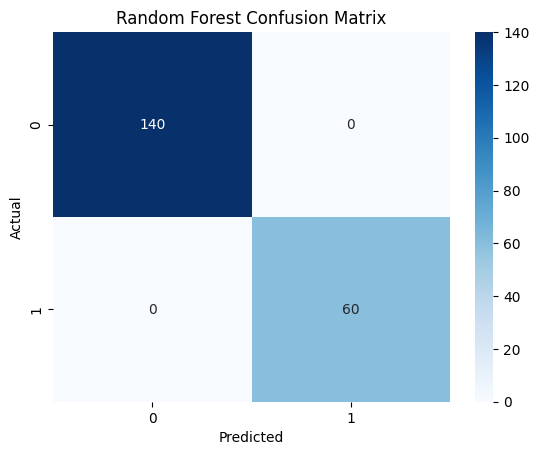

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ✅ Conclusion

Both Logistic Regression and Random Forest performed well, with Random Forest slightly outperforming in accuracy. Future work can include hyperparameter tuning and feature engineering.